In [24]:
# Open and read in the BioShock game script.

with open("Bioshock_Infinite.txt", "r") as file:
    Bio = file.read()
    
BioTextOrig = Bio.lower()
print(BioTextOrig[:400])

female voice: booker...are you afraid of god?

booker: no. but i'm afraid of you.

caption: "the mind of the subject will desperately struggle to create memories
         where none exist..."
                            - barriers to trans-dimensional travel
                                            r. lutece, 1889

caption: 1912, coast of maine

[booker, along with a man and woman, ride a dingh


In [25]:
# Determine how to isolate names precursing dialogue. 

import re
names = re.findall(r'.*?:',BioTextOrig)
print(names[:100])

['female voice:', 'booker:', 'caption:', 'caption:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'booker:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'booker:', 'gentleman:', 'booker:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'lady:', 'lady:', 'gentleman:', 'lady:', 'gentleman:', 'booker:', 'gentleman:', 'lady:', 'booker:', 'booker:', 'booker:', 'booker:', 'booker:', 'booker:', 'booker:', 'booker:', 'booker:', 'countdown voice:', 'booker:', 'booker:', 'countdown voice:', 'booker:', 'countdown voice:', 'booker:', 'countdown voice:', 'booker:', 'countdown voice:', 'countdown voice:', 'booker:', 'text:', 'mural:', 'booker:', 'male pilgrim:', 'booker:', 'witting:', 'witting:', 'booker:', 'witting:', 'booker:', 'crowd:', 'crowd:', 'crowd:', 'booker:', 'booker:', 'witting:', 'witting:', "[he's dunked again. flashback:", 'booker:', 'male voice:'

In [26]:
# Remove these names and check script

BioText = re.sub(r'.*?:',"",BioTextOrig)
print(BioText[:400])

 booker...are you afraid of god?

 no. but i'm afraid of you.

 "the mind of the subject will desperately struggle to create memories
         where none exist..."
                            - barriers to trans-dimensional travel
                                            r. lutece, 1889

 1912, coast of maine

[booker, along with a man and woman, ride a dinghy out towards a lighthouse.]

 are y


In [27]:
# Continue using RegEx to remove further troublesome characters. 

BioText = re.sub(r'.*?¯',"",BioText)
BioText = re.sub(r'.*?_',"",BioText)
print(BioText[:400])

 booker...are you afraid of god?

 no. but i'm afraid of you.

 "the mind of the subject will desperately struggle to create memories
         where none exist..."
                            - barriers to trans-dimensional travel
                                            r. lutece, 1889

 1912, coast of maine

[booker, along with a man and woman, ride a dinghy out towards a lighthouse.]

 are y


In [28]:
# Tokenize script with natural language toolkit.

import nltk
TokenList = nltk.word_tokenize(BioText)
BioWords = nltk.Text(TokenList)
print(BioWords[:10])

['booker', '...', 'are', 'you', 'afraid', 'of', 'god', '?', 'no', '.']


In [29]:
# Retrieve concordances with nltk. 

ConDat = BioWords.concordance("elizabeth", width=80, lines=264)

Displaying 96 of 96 matches:
y start ascending . ] be careful , elizabeth ! how do you know my name ? not no
 ] anna ... anna ! no , it 's me , elizabeth . are you alright ? where am i ? b
.. c'mon . hey , miss ... miss ... elizabeth ! hello ! oh , this is wonderful !
ain . how do -- ... never mind . [ elizabeth looks at their brooches ; they hav
, then i sha n't do this again . [ elizabeth , and a frightened crowd , watches
abelle . are you sure ? my name is elizabeth . do i know you ? elizabeth ? is n
ame is elizabeth . do i know you ? elizabeth ? is n't that a lovely name ? [ sh
 me out ! i want out of here now ! elizabeth ! stay away from me ! [ she slips 
rough the bars , fleeing ahead . ] elizabeth ! [ he fights off more policemen .
dead ... you killed those people ! elizabeth , i -- you 're a monster ! what di
t kill it . no , it 'll sting me ! elizabeth ! i have a better idea . what are 
! [ songbird flies around and sees elizabeth 's tear . ] close it ! i-i 'm tryi
. ] he will

In [30]:
# Open, read in, and split concordance, positive, and negative lists. 

with open("Liz_Con.txt", "r") as file:
    Liz_Con = file.read()
    
with open("positive.txt", "r") as file:
    positive = file.read()
    
with open("negative.txt", "r") as file:
    negative = file.read()
    
LizTokens = Liz_Con.split("\n")
posTokens = positive.split("\n")
negTokens = negative.split("\n")

print("Concordance: ",LizTokens[:3])
print("Positive Words: ",posTokens[:10])
print("Negative Words: ",negTokens[:10])

Concordance:  ['y start ascending . ] be careful , elizabeth ! how do you know my name ? not no', " ] anna ... anna ! no , it 's me , elizabeth . are you alright ? where am i ? b", ".. c'mon . hey , miss ... miss ... elizabeth ! hello ! oh , this is wonderful !"]
Positive Words:  ['abidance', 'abidance', 'abilities', 'ability', 'able', 'above', 'above-average', 'abundant', 'abundance', 'acceptance']
Negative Words:  ['abandoned', 'abandonment', 'aberration', 'aberration', 'abhorred', 'abhorrence', 'abhorrent', 'abhorrently', 'abhors', 'abhors']


In [31]:
# Append tokens of script in variable.

sentences = []
for token in LizTokens:
    sentences.append(token.split())

In [33]:
# Run concordances through sentiment analysis loop.

posnumTargetWords = 0
posmatchedWords = []
percntPos = []

negnumTargetWords = 0
negmatchedWords = []
percntNeg = []

sentiment = []  

for sentence in sentences:
    for token in posTokens:
        if token in sentence:
            
            posnumTargetWords += 1
            posmatchedWords.append(token)
            percntPos = (len(posmatchedWords)) / (len(sentence))
            
    for token in negTokens:
        if token in sentence:
            
            negnumTargetWords += 1
            negmatchedWords.append(token)
            percntNeg = (len(negmatchedWords)) / (len(sentence))
            sentiment = percntPos - percntNeg
            
            print("Positive: " + str(int(percntPos)) + "% " + "Negative: " + str(int(percntNeg)) + "% " + "Sentiment: " + str(sentiment))

Positive: 0% Negative: 0% Sentiment: 0.1411764705882353
Positive: 0% Negative: 0% Sentiment: 0.0888888888888889
Positive: 0% Negative: 0% Sentiment: 0.033333333333333354
Positive: 0% Negative: 0% Sentiment: 0.047619047619047616
Positive: 0% Negative: 0% Sentiment: 0.0
Positive: 0% Negative: 0% Sentiment: -0.09523809523809523
Positive: 0% Negative: 0% Sentiment: -0.03749999999999998
Positive: 0% Negative: 0% Sentiment: 0.43333333333333335
Positive: 0% Negative: 0% Sentiment: 0.38333333333333336
Positive: 0% Negative: 0% Sentiment: 0.2450980392156863
Positive: 1% Negative: 0% Sentiment: 0.6722222222222223
Positive: 1% Negative: 0% Sentiment: 0.6222222222222223
Positive: 1% Negative: 0% Sentiment: 0.5722222222222223
Positive: 1% Negative: 0% Sentiment: 0.4922600619195048
Positive: 1% Negative: 0% Sentiment: 0.6470588235294117
Positive: 1% Negative: 0% Sentiment: 0.7555555555555555
Positive: 1% Negative: 0% Sentiment: 0.7055555555555556
Positive: 1% Negative: 0% Sentiment: 0.65555555555555

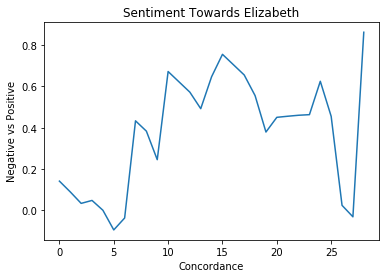

In [34]:
# Plot sentiment in a line graph.

import matplotlib.pyplot as plt
import numpy
%matplotlib inline

LizSent = [0.1411764705882353,0.0888888888888889,0.033333333333333354,0.047619047619047616,0.0,-0.09523809523809523,-0.03749999999999998,0.43333333333333335,0.38333333333333336,0.2450980392156863,0.6722222222222223,0.6222222222222223,0.5722222222222223,0.4922600619195048,0.6470588235294117,0.7555555555555555,0.7055555555555556,0.6555555555555556,0.5555555555555556,0.3790849673202614,0.45029239766081863,0.4555555555555555,0.46031746031746024,0.46323529411764697,0.625,0.45510835913312686,0.023809523809523725,-0.031746031746031855,0.8625730994152045]
plt.plot(LizSent) 

plt.xlabel('Concordance') 
plt.ylabel('Negative vs Positive')
plt.title('Sentiment Towards Elizabeth') 
plt.show() 

In [35]:
# Find concordances for elizabeth dialogue with function, pullText2. 

def pullText2(index,what):
    leftInd = index - 1
    rightInd = index + 80
    theFound = what[leftInd:rightInd].replace("\r\n"," ")
    return theFound

In [36]:
word2find = input("What word do you want a concordance for? ").lower()
theRange = range(BioTextOrig.count(word2find)) 

theLocation = 0

for instance in theRange:
    print(pullText2(theLocation,BioTextOrig))
    theLocation = BioTextOrig.find(word2find,theLocation) + 1

What word do you want a concordance for? elizabeth

elizabeth: who are you?

booker: my name is dewitt. i'm a friend. i've come to ge
elizabeth: get away.

[she quits resisting after a few moments.]

elizabeth: are 
elizabeth: are you real?

booker: i'm real enough.

[a weird whistle alarm sounds
elizabeth: he's coming...y-you've gotta go.

booker: why?

elizabeth: you don't w
elizabeth: you don't wanna be here when he gets here.

[she yells at the hole boo
elizabeth: just a minute! i'm getting dressed!

booker: i can get you outta here.
elizabeth: there's no way out, trust me, i've looked.

[she yells at the ceiling 
elizabeth: stop it! you're too impatient! that's enough!

booker: w-what about th
elizabeth: what about it?

booker: this is the way out, isn't it?

elizabeth: w-w
elizabeth: w-what are you...? give it to me!

[a weird chirping noise rings out a
elizabeth: huh... it's a way out! come on, this way!

[the building shakes.]

eli
elizabeth: it's his job to keep me locked up i

elizabeth: i thought--

cohen pa: pain and beauty. to an artist, they are parent 
elizabeth: look...

booker: fontaine's. ryan sunk the whole thing to the bottom.

elizabeth: but it's a prison now. why would cohen have sent sally there?

booker:
elizabeth: how many people do you suppose ryan's got locked up in that place?

bo
elizabeth: takes a cold son of a bitch to do that to a living person.

booker: wh
elizabeth: burial at sea.

booker: you read your residency contract with ryan ind
elizabeth: oof.

booker: don't get too comfortable. keep your eyes open.

elizabe
elizabeth: seem to be some supplies this way, mr. dewitt.

booker: it's "booker."
elizabeth: what?

booker: just call me "booker."

elizabeth: if it's all the same
elizabeth: if it's all the same to you, let's leave it at "mr. dewitt."

[booker 
elizabeth: look up there. let's have another look around. perhaps we'll be
      
elizabeth: a sky-hook.

booker: "sky-hook"? you mean the "air-grabber"? kids use 
elizabeth: "air-

In [37]:
# Open and read in required files. 

with open("liz_dia_sent.txt", "r") as file:
    Liz_Dia_Con = file.read()
    
with open("positive.txt", "r") as file:
    positive = file.read()
    
with open("negative.txt", "r") as file:
    negative = file.read()
    
LizTokens = Liz_Dia_Con.split("\n")
posTokens = positive.split("\n")
negTokens = negative.split("\n")

print("Concordance: ",LizTokens[:3])
print("Positive Words: ",posTokens[:10])
print("Negative Words: ",negTokens[:10])

Concordance:  ['elizabeth: who are you?', '', "booker: my name is dewitt. i'm a friend. i've come to ge"]
Positive Words:  ['abidance', 'abidance', 'abilities', 'ability', 'able', 'above', 'above-average', 'abundant', 'abundance', 'acceptance']
Negative Words:  ['abandoned', 'abandonment', 'aberration', 'aberration', 'abhorred', 'abhorrence', 'abhorrent', 'abhorrently', 'abhors', 'abhors']


In [38]:
# Append new token list. 

sentences = []
for token in LizTokens:
    sentences.append(token.split())

In [39]:
# Run through sentiment analysis loop.

posnumTargetWords = 0
posmatchedWords = []
percntPos = []

negnumTargetWords = 0
negmatchedWords = []
percntNeg = []

sentiment = []  

for sentence in sentences:
    for token in posTokens:
        if token in sentence:
            
            posnumTargetWords += 1
            posmatchedWords.append(token)
            percntPos = (len(posmatchedWords)) / (len(sentence))
            
    for token in negTokens:
        if token in sentence:
            
            negnumTargetWords += 1
            negmatchedWords.append(token)
            percntNeg = (len(negmatchedWords)) / (len(sentence))
            sentiment = percntPos - percntNeg
            
            print(str(sentiment) + ',')

0.04999999999999999,
-0.15000000000000002,
-0.35,
-0.41666666666666663,
-0.04761904761904767,
-0.19047619047619047,
-1.666666666666667,
-0.2222222222222222,
-0.6190476190476192,
-0.761904761904762,
-1.1666666666666665,
-1.3333333333333335,
0.04999999999999993,
-1.416666666666667,
0.625,
2.3333333333333335,
-4.051282051282051,
-4.384615384615385,
-0.375,
0.125,
-0.07500000000000018,
2.4305555555555554,
2.3194444444444446,
3.6000000000000005,
3.4000000000000004,
-4.75,
-5.083333333333334,
-5.416666666666668,
1.9469696969696968,
1.4196428571428572,
3.375,
2.406593406593407,
2.3351648351648353,
2.263736263736264,
1.2848484848484851,
1.1939393939393939,
2.754545454545454,
2.6545454545454543,
5.696428571428571,
5.571428571428571,
3.0000000000000004,
2.216666666666667,
2.116666666666667,
4.75,
4.625,
3.384615384615385,
3.006410256410257,
2.9230769230769234,
0.5606060606060606,
5.222222222222223,
2.2777777777777786,
2.1111111111111125,
3.2063492063492074,
3.063492063492064,
0.125,
0.0,
5.66666

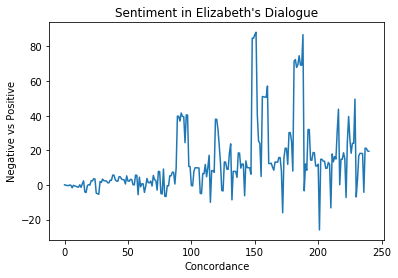

In [40]:
# Plot and graph new sentiment analysis results. 

import matplotlib.pyplot as plt
import numpy
%matplotlib inline

LizSent = [0.04999999999999999,-0.15000000000000002,-0.35,-0.41666666666666663,-0.04761904761904767,-0.19047619047619047,-1.666666666666667,-0.2222222222222222,-0.6190476190476192,-0.761904761904762,-1.1666666666666665,-1.3333333333333335,0.04999999999999993,-1.416666666666667,0.625,2.3333333333333335,-4.051282051282051,-4.384615384615385,-0.375,0.125,-0.07500000000000018,2.4305555555555554,2.3194444444444446,3.6000000000000005,3.4000000000000004,-4.75,-5.083333333333334,-5.416666666666668,1.9469696969696968,1.4196428571428572,3.375,2.406593406593407,2.3351648351648353,2.263736263736264,1.2848484848484851,1.1939393939393939,2.754545454545454,2.6545454545454543,5.696428571428571,5.571428571428571,3.0000000000000004,2.216666666666667,2.116666666666667,4.75,4.625,3.384615384615385,3.006410256410257,2.9230769230769234,0.5606060606060606,5.222222222222223,2.2777777777777786,2.1111111111111125,3.2063492063492074,3.063492063492064,0.125,0.0,5.666666666666667,5.555555555555555,-5.666666666666666,4.467948717948719,-1.0833333333333321,0.7115384615384617,0.5865384615384617,-4.338461538461539,-0.8241758241758248,3.7472527472527473,1.3090909090909095,1.2181818181818187,2.196428571428571,-0.6527777777777777,5.474025974025974,3.0,2.5857142857142854,-3.0256410256410255,7.833333333333332,7.666666666666666,-5.020833333333334,-5.1875,9.177777777777777,-6.533333333333333,-6.7333333333333325,-0.42857142857142705,-0.5714285714285712,5.2857142857142865,5.214285714285715,7.363636363636363,7.2727272727272725,0.5151515151515156,9.608391608391607,39.75,39.65,36.85714285714286,41.54545454545455,39.55555555555556,39.44444444444444,24.4,40.47222222222222,40.361111111111114,10.678571428571429,10.607142857142858,-0.37179487179487225,-0.5384615384615401,7.878205128205126,9.96153846153846,9.89903846153846,9.83653846153846,9.77403846153846,-4.882352941176471,-5.049019607843139,6.611111111111111,6.499999999999998,11.833333333333332,4.708333333333332,10.064102564102562,17.125,-10.041666666666664,8.285714285714285,8.214285714285714,7.25,37.969230769230776,37.892307692307696,31.950000000000003,22.6,12.188811188811188,-3.2727272727272734,-3.4727272727272727,13.26060606060606,13.193939393939393,9.1,9.0,18.266666666666666,23.714285714285715,-8.61904761904762,7.866666666666667,7.800000000000001,7.733333333333334,4.345454545454546,18.476190476190474,18.404761904761905,9.692307692307693,12.090909090909092,12.000000000000002,-6.270833333333332,13.9,10.0,9.928571428571429,9.857142857142858,6.170940170940174,84.78787878787878,84.69696969696969,86.71794871794872,88.19999999999999,40.475,25.291666666666664,24.034090909090907,4.857142857142854,51.08333333333333,50.91666666666667,50.75,50.58333333333333,57.125,12.351648351648352,12.280219780219781,12.583333333333334,10.266666666666666,8.497435897435896,13.250000000000002,13.166666666666668,13.083333333333334,15.833333333333334,15.766666666666667,8.055555555555557,-16.083333333333332,15.5,21.233333333333334,21.166666666666664,11.875,30.25,30.1875,25.214285714285715,7.976923076923075,71.5,72.42857142857143,67.85,69.43181818181819,74.625,69.25,69.1590909090909,86.83333333333333,-3.435897435897438,12.133333333333335,8.475000000000001,32.02884615384615,31.951923076923077,14.375,14.208333333333336,18.732142857142858,18.589285714285715,10.98809523809524,10.904761904761905,11.9375,-26.0,14.846153846153845,14.769230769230768,13.714285714285715,13.642857142857144,9.538961038961041,9.662337662337663,13.0,11.933333333333334,-13.271428571428576,17.909090909090907,13.32867132867133,16.384615384615387,14.929487179487179,30.999999999999996,43.77380952380952,0.10000000000000142,14.866666666666665,14.799999999999999,18.583333333333332,15.066666666666666,-7.299999999999997,24.999999999999996,39.56730769230769,26.333333333333332,18.295238095238098,24.099999999999998,24.0,49.58333333333333,-6.950000000000003,3.133333333333333,16.800000000000004,18.269230769230766,18.185897435897434,18.1025641025641,-4.285714285714285,21.214285714285715,21.15546218487395,19.53846153846154,19.46153846153846]
plt.plot(LizSent) 

plt.xlabel('Concordance') 
plt.ylabel('Negative vs Positive')
plt.title("Sentiment in Elizabeth's Dialogue") 
plt.show() 